**6. Object detection using Transfer Learning of CNN architectures**

a. Load in a pre-trained CNN model trained on a large dataset

b. Freeze parameters (weights) in model’s lower convolutional layers

c. Add custom classifier with several layers of trainable parameters to
model
d. Train classifier layers on training data available for task

e. Fine-tune hyper parameters and unfreeze more layers as needed

In [ ]:
# Imports libraries

import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical


In [ ]:
## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",
 split=["train[:70%]", "train[:30%]"], ## Train test split
 batch_size=-1,
 as_supervised=True, # Include labels
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


image processing

In [ ]:
## check existing image size
train_ds[0].shape

TensorShape([442, 1024, 3])

In [ ]:
## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))


In [ ]:
train_labels

<tf.Tensor: shape=(2569,), dtype=int64, numpy=array([2, 3, 3, ..., 0, 2, 0])>

In [ ]:
## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)


In [ ]:
train_labels[0]


array([0., 0., 1., 0., 0.], dtype=float32)



```**bold text**
**# This is formatted as code**
```

**Use Pretrained VGG16 Image Classification model
Load a pre-trained CNN model trained on a large
dataset**


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


In [ ]:
train_ds[0].shape


TensorShape([150, 150, 3])

In [ ]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
## will not train base mode
# Freeze Parameters in model's lower convolutional layers
base_model.trainable = False
## Preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)



58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
## will not train base mode
# Freeze Parameters in model's lower convolutional layers
base_model.trainable = False

In [ ]:
## Preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)


In [ ]:
# model details
base_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

**Add custom classifier with two dense layers of trainable parameters to model**

In [ ]:
#add our layers on top of this model
from tensorflow.keras import layers, models
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')
model = models.Sequential([
 base_model,
 flatten_layer,
 dense_layer_1,
 dense_layer_2,
 prediction_layer
])

**Train classifier layers on training data available for task**

> Indented block




In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(
 optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'],
)

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)



In [ ]:
history=model.fit(train_ds, train_labels, epochs=1, validation_split=0.2, batch_size=32 ,callbacks=[es])

65/65 [==============================] - 595s 9s/step - loss: 2.3169 - accuracy: 0.4594 - val_loss: 1.1773 - val_accuracy: 0.5681


In [ ]:
los,accurac=model.evaluate(test_ds,test_labels)
print("Loss: ",los,"Accuracy: ", accurac)


35/35 [==============================] - 246s 7s/step - loss: 0.8638 - accuracy: 0.6521
Loss:  0.8638346791267395 Accuracy:  0.6521344184875488


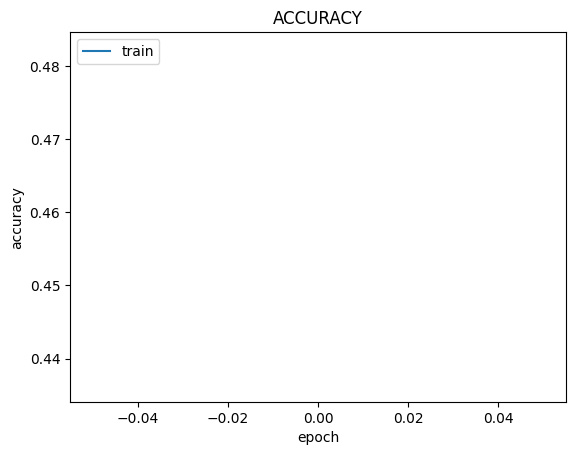

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
y_pred = model.predict(test_ds)
y_classes = [np.argmax(element) for element in y_pred]
#to_categorical(y_classes, num_classes=5)
#to_categorical(test_labels, num_classes=5)
print(y_classes[:10])
print("\nTest")
print(test_labels[:10])


35/35 [==============================] - 247s 7s/step
[2, 4, 3, 0, 3, 2, 1, 1, 0, 0]

Test
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
